# Titanic Case Study 

In this project, we analyze the Titanic dataset to extract interesting patterns and build a logistic regression model to predict survival. 
We start by loading and cleaning the data, followed by exploratory data analysis (EDA) to understand the key factors influencing survival. Finally, we build and evaluate a logistic regression model and a neural network to predict passenger survival.

## 1) Importation and Cleaning 


In [334]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

Dataset loading 

In [335]:
df = pd.read_csv('titanic.csv')
df.index = range(1, len(df) + 1)

In [336]:
df.shape 

(891, 12)

In [337]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


df cleaning by dropping rows with missing values (specially identified for the attributes 'Age' and 'Embarked')

In [338]:
df.dropna(subset=['Age', 'Embarked'], inplace=True)

## 2) Exploratory Data Analysis 

* Overall survival rate

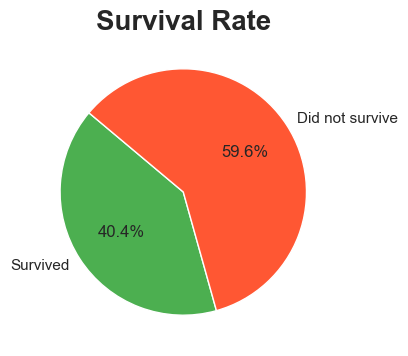

In [339]:
total_survival = df['Survived'].sum()
rate_survival = total_survival / len(df) * 100

plt.figure(figsize=(4, 4))
plt.pie([total_survival, len(df) - total_survival], labels=['Survived', 'Did not survive'],
        autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FF5733'])
plt.title('Survival Rate', fontweight='bold', fontsize=20)
plt.show()

The overall survival rate is visualized using a pie chart, showing the proportion of passengers who survived versus those who did not. This provides a quick overview of the survival distribution.

Implementation of a useful function to visualise survival rate by selected attributes 

In [340]:
def visualize_survival_rate(df, column, title):

    survived = df[df['Survived'] == 1][column].value_counts()
    not_survived = df[df['Survived'] == 0][column].value_counts()
    survival_rate = (survived / (survived + not_survived) * 100).sort_index()
    plt.figure(figsize=(7, 5))
    sns.barplot(x=survival_rate.index, y=survival_rate.values, palette='viridis')
    plt.title(f'Survival Rate by {title}', fontweight='bold', fontsize=20)
    plt.ylabel('Survival Rate (%)')
    plt.xlabel(title)
    plt.show()

* Survival rate by gender 

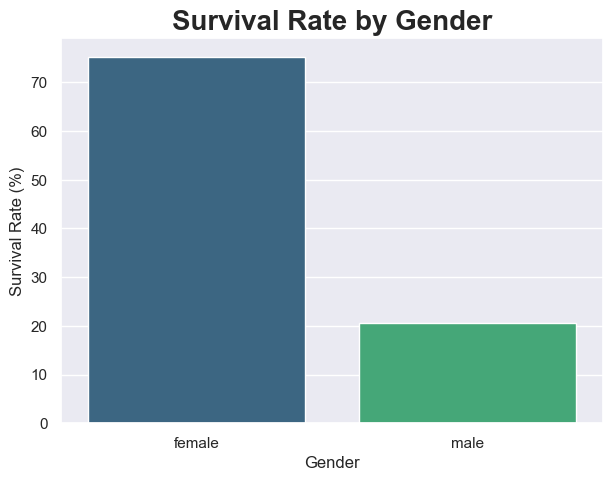

In [341]:
visualize_survival_rate(df, 'Sex', 'Gender')

The survival rate by gender is visualized using pie charts, highlighting the differences in survival rates between males and females. This analysis clearly reveals that females had a higher survival rate compared to males.

* Passenger Genger Distribution 

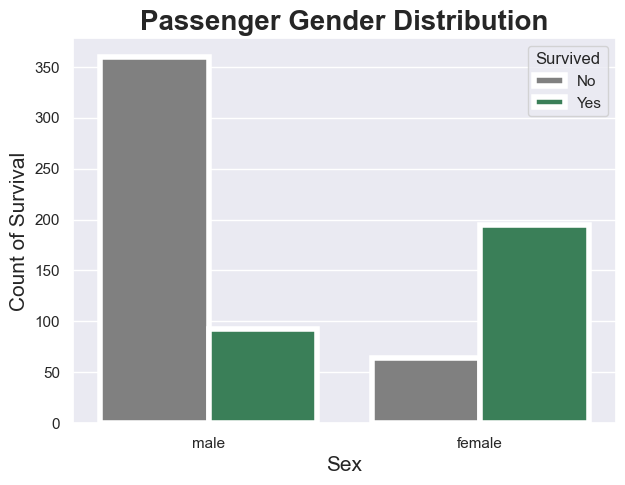

In [342]:
palette = {1 : "seagreen", 0 : "gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (7,5))
ax = sns.countplot(x = "Sex", hue="Survived", data = df, linewidth=4, palette = palette)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution", fontsize = 20, fontweight='bold')
plt.xlabel("Sex", fontsize = 15)
plt.ylabel("Count of Survival", fontsize = 15)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

* Survival rate by passenger class 

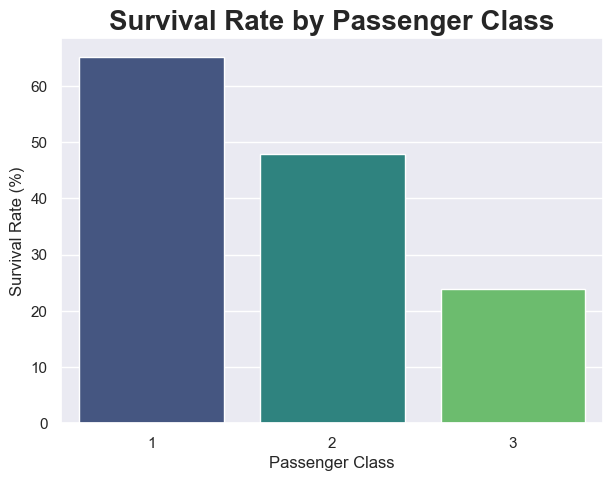

In [343]:
visualize_survival_rate(df, 'Pclass', 'Passenger Class')

The survival rate by passenger class is analyzed, showing how passengers in different classes (1st, 2nd, 3rd) fared in terms of survival. First-class passengers usually have the highest survival rates.

* Survival rate by Embarkation Point 

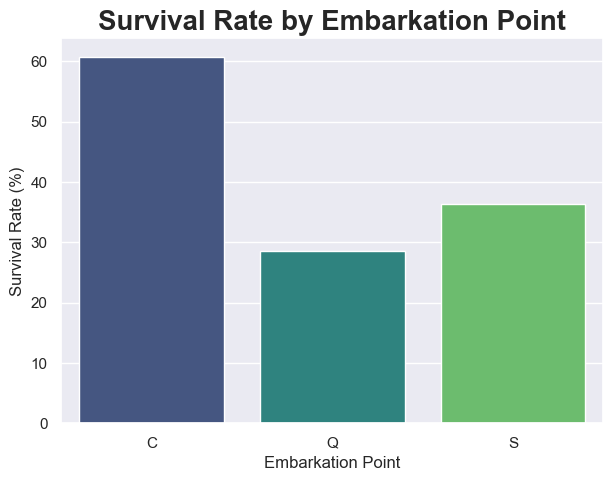

In [344]:
visualize_survival_rate(df, 'Embarked', 'Embarkation Point')

The analysis of survival rates based on the embarkation point provides insights into how the port of embarkation influenced survival odds. Passengers embarking from different ports (C, Q, S) may show varying survival rates.

* Distribution of Passengers Age 

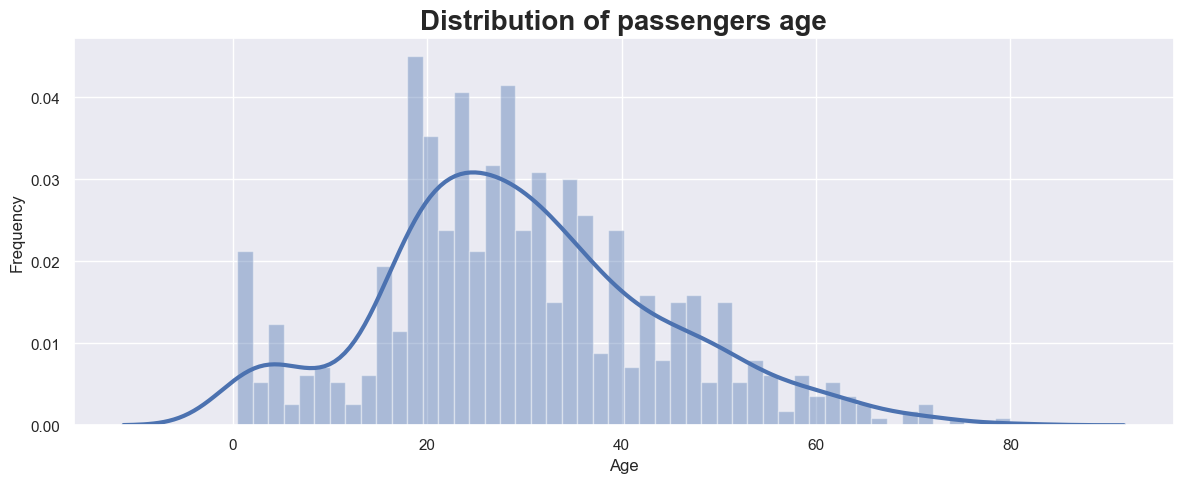

In [345]:
# set plot size
plt.figure(figsize=(12, 5))

# plot a univariate distribution of Age observations 
sns.distplot(df[(df["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)

# set titles and labels
plt.title('Distribution of passengers age',fontsize= 20, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
# clean layout
plt.tight_layout()

* Boxplot for Age by Survival Status

Text(0.5, 1.0, 'Boxplot of Age by Survival Status')

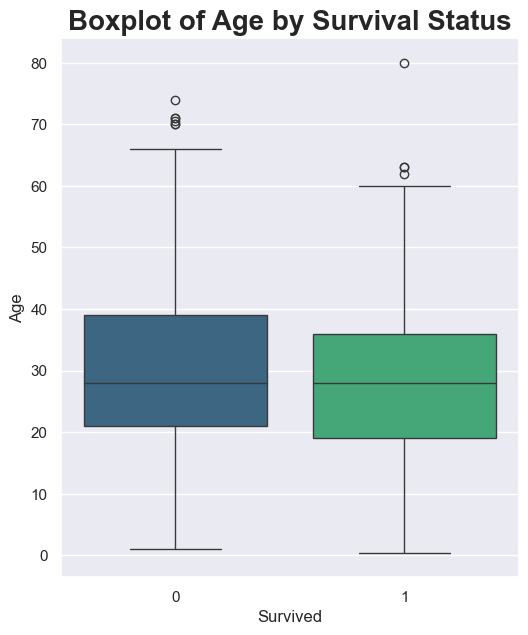

In [346]:
plt.figure(figsize=(13, 7))
plt.subplot(1, 2, 1)
sns.boxplot(x='Survived', y='Age', data=df, palette='viridis')
plt.title('Boxplot of Age by Survival Status', fontsize=20, fontweight='bold')

* QQ-Plots for Age and Fare 

Text(0.5, 1.0, 'QQ-Plot of Age')

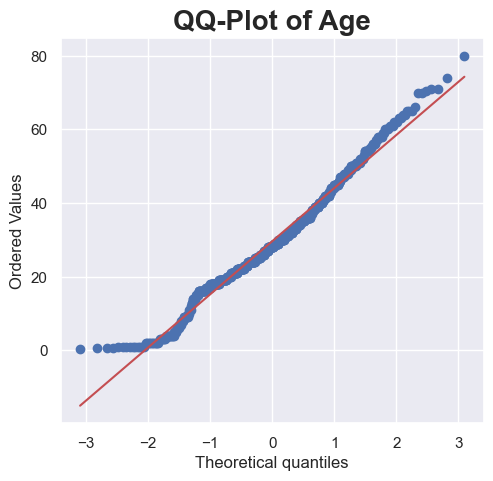

In [347]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
stats.probplot(df['Age'].dropna(), dist="norm", plot=plt)
plt.title('QQ-Plot of Age', fontsize=20, fontweight='bold')

QQ-plots are used to assess the normality of the 'Age' distribution. Thid plot help in understanding whether the df follows a normal distribution.

* Distribution of Survival in Age

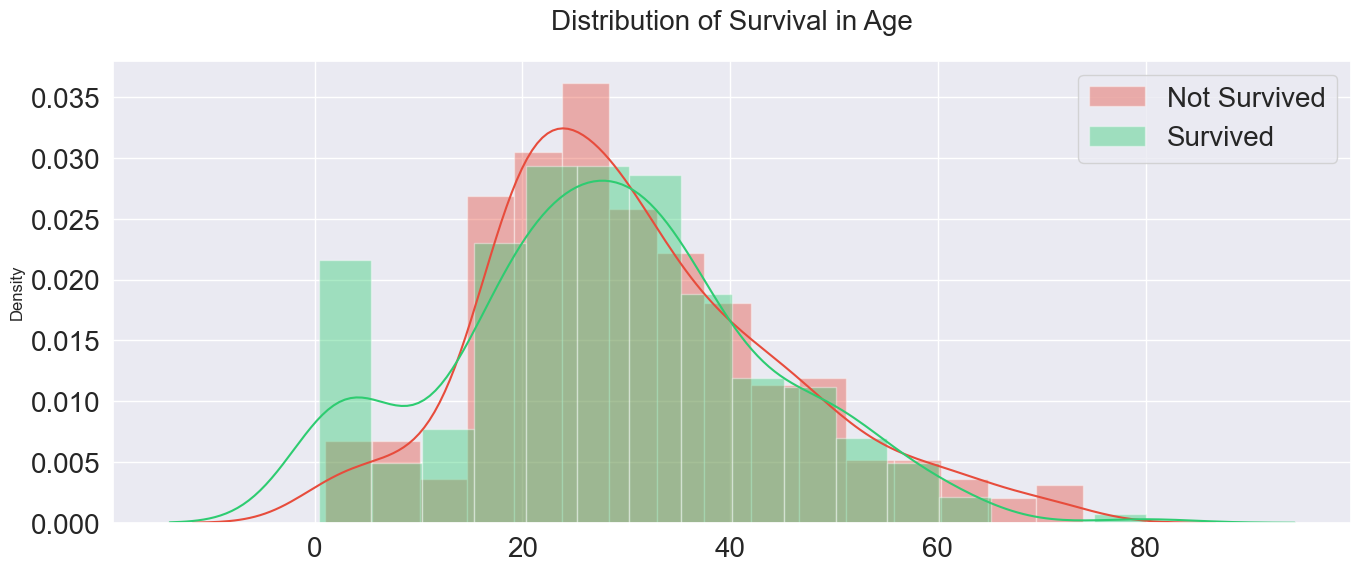

In [348]:
cont_features = ['Age']
surv = df['Survived'] == 1

fig, ax = plt.subplots(figsize=(9, 6))
plt.subplots_adjust(right=1.5)

feature = cont_features[0]

# Distribution of survival in feature
sns.distplot(df[~surv][feature], label='Not Survived', hist=True, color='#e74c3c', ax=ax)
sns.distplot(df[surv][feature], label='Survived', hist=True, color='#2ecc71', ax=ax)

# Set labels and title
ax.set_xlabel('')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.legend(loc='upper right', prop={'size': 20})
ax.set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)

plt.show()

# 3) Correlation Matrix 

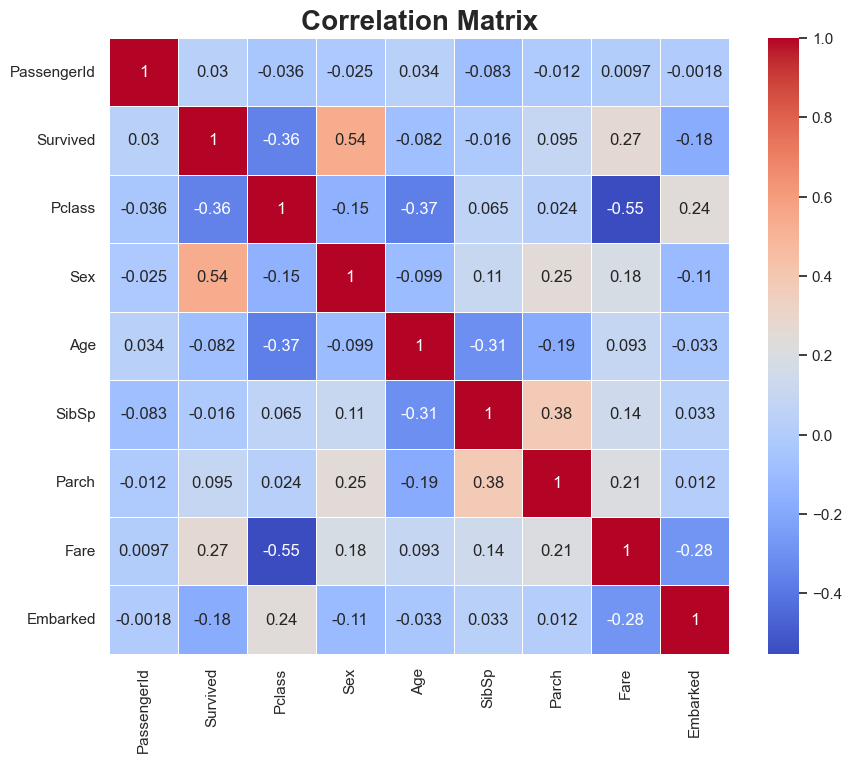

Survived       1.000000
Sex            0.536762
Fare           0.266100
Parch          0.095265
PassengerId    0.029526
SibSp         -0.015523
Age           -0.082446
Embarked      -0.181979
Pclass        -0.356462
Name: Survived, dtype: float64


In [349]:
# Convert categorical variables into numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})                # 0 for male and 1 for female 
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})      

# Handle missing values by filling them with the median value to not affect results.
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].median(), inplace=True)

# Drop columns that are not useful for correlation
df_corr = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix', fontsize=20, fontweight='bold')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Analyze the correlation
print(corr_matrix['Survived'].sort_values(ascending=False))

# 4) Logistic Regression and Confusion Matrix 

* Importation of necessary packages 

In [350]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [351]:
# Selecting features and target
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]

# The following line allows to convert categorical variables meaning 
# (non-numerical) into a format that can be provided to machine learning algorithms (One-hot encoding)
X = pd.get_dummies(X, drop_first=True)   
# Target variable is survival                
y = df['Survived']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define and train the Logistic Regression model
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

# Predict the test set results
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results 
print('Accuracy:', accuracy)
print('Confusion Matrix :')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7902097902097902
Confusion Matrix :
[[73  7]
 [23 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        80
           1       0.85      0.63      0.73        63

    accuracy                           0.79       143
   macro avg       0.81      0.77      0.78       143
weighted avg       0.80      0.79      0.78       143



The model is evaluated using accuracy, confusion matrix, and classification report. 
These metrics provide insights into the model's performance in terms of precision, recall, and overall accuracy.

* Confusion Matrix 

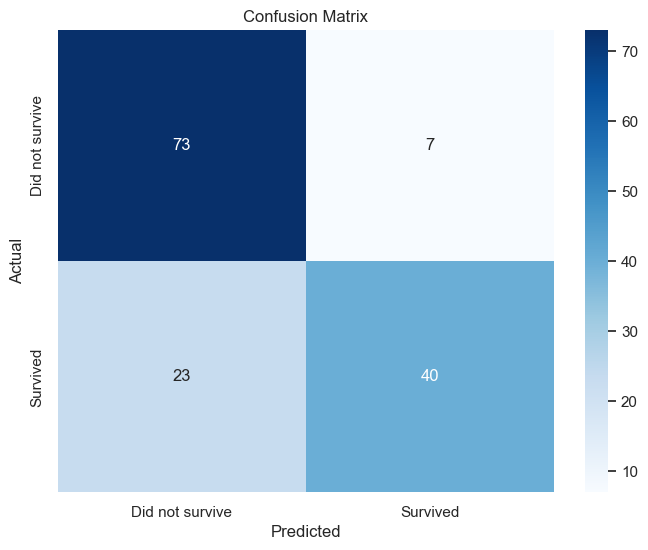

In [352]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix heatmap visually represents the model's performance by showing the true positives, true negatives, false positives, and false negatives.

* ROC Curve 

AUC Score: 0.81


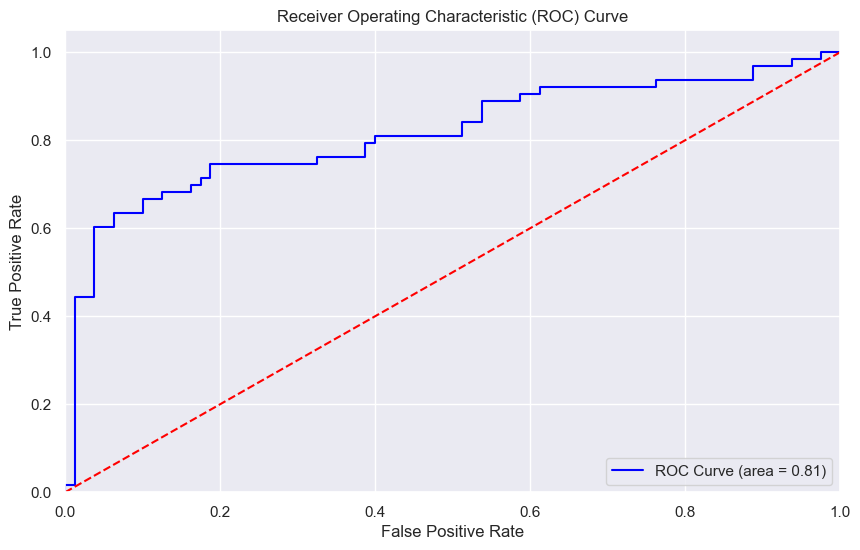

In [353]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {roc_auc:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The closer the AUC (Area Under the Curve) score is to 1, the better the performance of the binary classification model.

# 5) Neural Network 

In [354]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [355]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convert categorical variables into numerical values
data = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Drop columns that are not useful for the model
data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Define features and target
X = data.drop(columns=['Survived'])
y = data['Survived']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler() # Standardize the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network architecture
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the neural network
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5608 - loss: 0.7146 - val_accuracy: 0.6667 - val_loss: 0.6436
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6025 - loss: 0.6777 - val_accuracy: 0.6930 - val_loss: 0.6171
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5805 - loss: 0.6633 - val_accuracy: 0.7105 - val_loss: 0.5996
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6365 - loss: 0.6644 - val_accuracy: 0.7193 - val_loss: 0.5894
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6107 - loss: 0.6753 - val_accuracy: 0.7193 - val_loss: 0.5804
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6798 - loss: 0.6061 - val_accuracy: 0.7368 - val_loss: 0.5718
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.6365 - loss: 0.6184 - val_accuracy: 0.7544 - val_loss: 0.5628
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.6925 - loss: 0.5980 - val_accuracy: 0.7544 - val_l

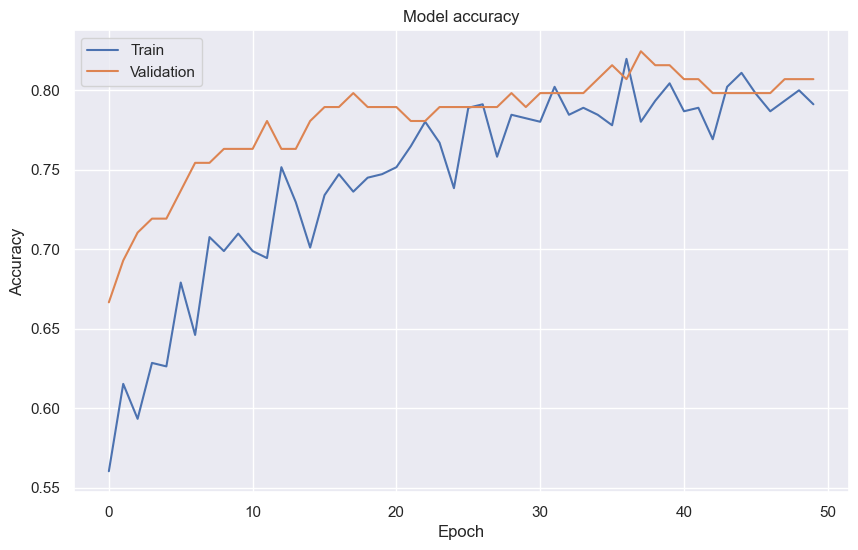

In [356]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

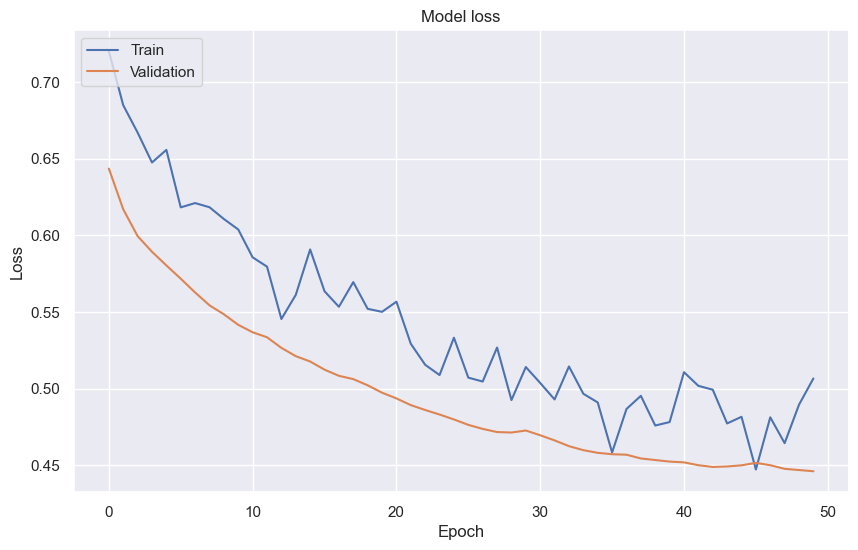

In [357]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 6) Conclusion 

In this project, we performed an in-depth analysis of the Titanic dataset. 
We started with df cleaning and exploratory df analysis to understand the key factors influencing passenger survival. 
Our analysis revealed that gender, passenger class, and fare significantly impacted survival odds, with females, first-class passengers, and those who paid higher fares having higher survival rates. 
We then built a logistic regression model to predict survival, achieving a commendable accuracy. 
The ROC curve and AUC score further validated the model's performance. 
We ended our research by the implementation of a Neural Network with an accuracy of 75% but that we believe could be improved with a larger dataset containing the informations of all the 2200 passengers of the Titanic.